<a href="https://colab.research.google.com/github/Charltec/Final/blob/main/Final_Charlie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
!pip install nbconvert
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from chainconsumer import ChainConsumer
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing


In [300]:
# Let the program read de data frame we implemented
diabetes_data = 'https://raw.githubusercontent.com/Charltec/Final/main/diabetes.csv'
data_frame = pd.read_csv(diabetes_data)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [301]:
# Table of the dataframe
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [302]:
# Data frame description
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [303]:
# data_frame = data_frame.mean()
# Erase all the incomplete data
data_frame = data_frame[-(data_frame[data_frame.columns[1:-1]] == 0).any(axis=1)]
data_frame = data_frame[['Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']] 
# Data frame with no empty data
data_frame.head()

,Glucose,Insulin,BMI,Age,Outcome
3,89,94,28.1,21,0
4,137,168,43.1,33,1
6,78,88,31.0,26,1
8,197,543,30.5,53,1
13,189,846,30.1,59,1


In [304]:
# Data frame description without the incomplete data
data_frame.describe()

,Glucose,Insulin,BMI,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,122.627551,156.056122,33.086224,30.864796,0.331633
std,30.860781,118.841690,7.027659,10.200777,0.471401
min,56.000000,14.000000,18.200000,21.000000,0.000000
25%,99.000000,76.750000,28.400000,23.000000,0.000000
50%,119.000000,125.500000,33.200000,27.000000,0.000000
75%,143.000000,190.000000,37.100000,36.000000,1.000000
max,198.000000,846.000000,67.100000,81.000000,1.000000


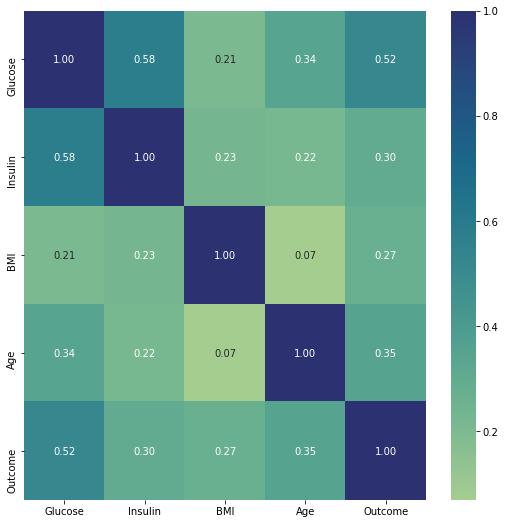

In [305]:
# Correlation
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data_frame.corr()), annot=True, cmap='crest', fmt='0.2f')

In [306]:
x = data_frame.drop('Outcome', axis=1)
print(x)

y = data_frame['Outcome']
y = y.values
# print(y)

     Glucose  Insulin   BMI  Age
3         89       94  28.1   21
4        137      168  43.1   33
6         78       88  31.0   26
8        197      543  30.5   53
13       189      846  30.1   59
..       ...      ...   ...  ...
753      181      510  43.3   26
755      128      110  36.5   37
760       88       16  28.4   22
763      101      180  32.9   63
765      121      112  26.2   30

[392 rows x 4 columns]


Best features : ['Glucose', 'Insulin', 'BMI', 'Age']


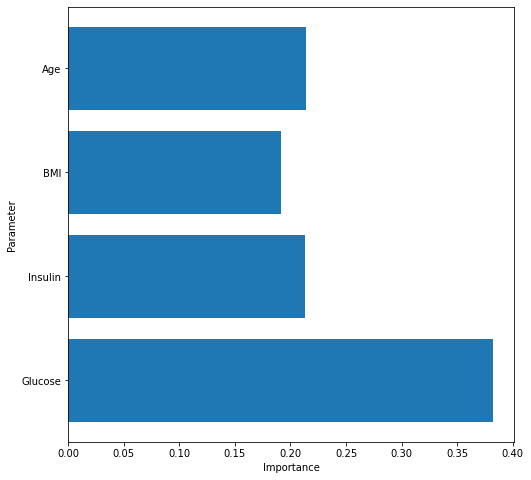

In [307]:
# Delimit the best parameters for the best analysis
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

cv_estimator = RandomForestClassifier(random_state =42)
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.3, random_state=42)
cv_estimator.fit(X_train, Y_train)
cv_selector = RFECV(cv_estimator,cv= 5, step=1,scoring='accuracy')
cv_selector = cv_selector.fit(X_train, Y_train)
rfecv_mask = cv_selector.get_support() #list of booleans
rfecv_features = [] 
for bool, feature in zip(rfecv_mask, X_train.columns):
 if bool:
  rfecv_features.append(feature)
  
# print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)
n_features = X_train.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.xlabel('Importance')
plt.ylabel('Parameter')
plt.show()


In [308]:
# Model kfold
kfold = model_selection.KFold(n_splits=10, shuffle=True)
#kfold_model = RandomForestClassifier()
kfold_model = LogisticRegression()
kfold_results = model_selection.cross_val_score(kfold_model, x, y, cv=kfold)

In [309]:
print('Accuracy: %1f%%' % (kfold_results.mean()*100))

Accuracy: 79.352564%


<Figure size 432x288 with 0 Axes>

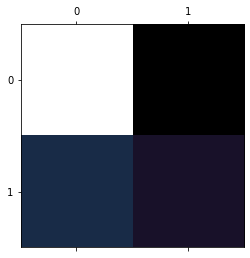

In [310]:
# It helps to know how many correct and incorrect answers our algorithm got
from sklearn import metrics
model_kfold.fit(X_train,Y_train)
prediction = model_kfold.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, prediction)
confusion_matrix

plt.figure()
plt.matshow(confusion_matrix, cmap='cubehelix')

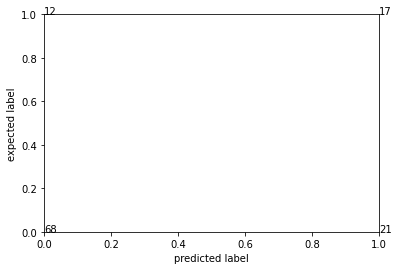

In [311]:
for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

In [312]:
print("Sensitivity: %d%%" % (TP*100 / float(TP + FN)))

Sensitivity: 44%


In [313]:
print("Specificity  : %d%%" % (TN*100 / float(TN + FP)))


Specificity  : 85%
